In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Reading the CSV file and doing basic analysis

In [69]:
df = pd.read_csv("customer_churn.csv")

In [70]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [71]:
df.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [5]:
# Checking for missing values in the dataset
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [6]:
# Checking for the datatypes of the features
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

### Finding patterns in the data

In [7]:
# Compare target column with Gender column
pd.crosstab(df.Churn, df.Gender)

Gender,Female,Male
Churn,,
0,25272,24949
1,24944,24835


* There is almost an equal distribution of Male and Female Customers being churned and not being churned
* Number of Female Customers is very slightly more than the number of Male Customers

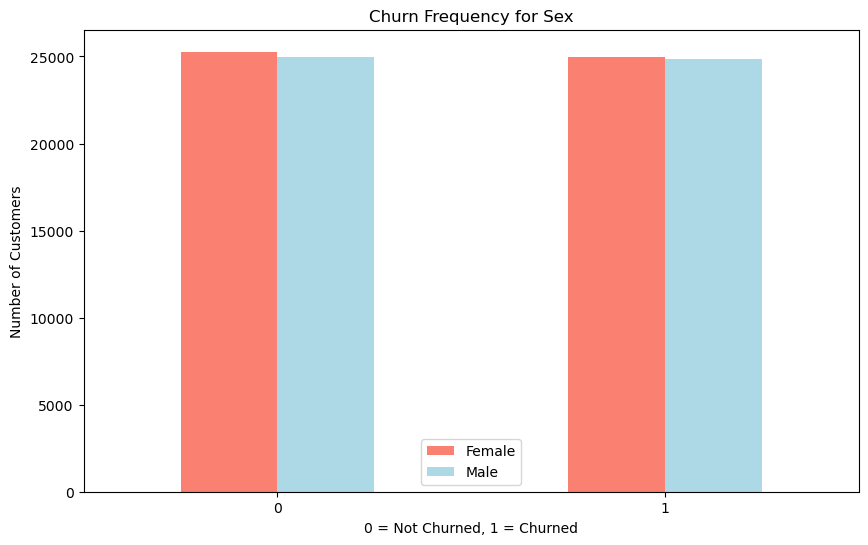

In [8]:
# Plot of crosstab
pd.crosstab(df.Churn, df.Gender).plot(kind="bar", figsize=(10,6),color=["salmon", "lightblue"])
plt.title("Churn Frequency for Sex")
plt.xlabel("0 = Not Churned, 1 = Churned")
plt.ylabel("Number of Customers")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

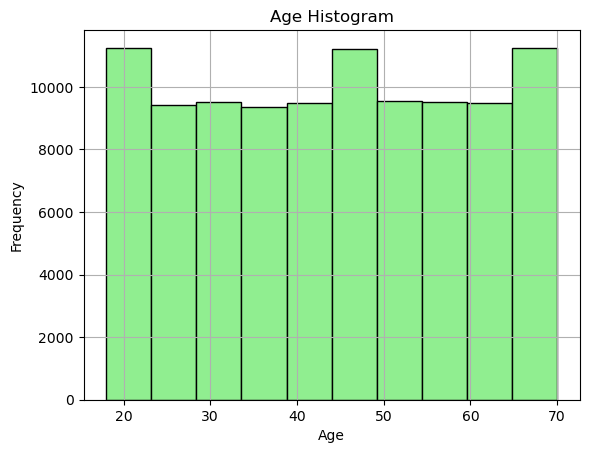

In [9]:
df["Age"].hist(bins=10, color='lightgreen', edgecolor='black')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

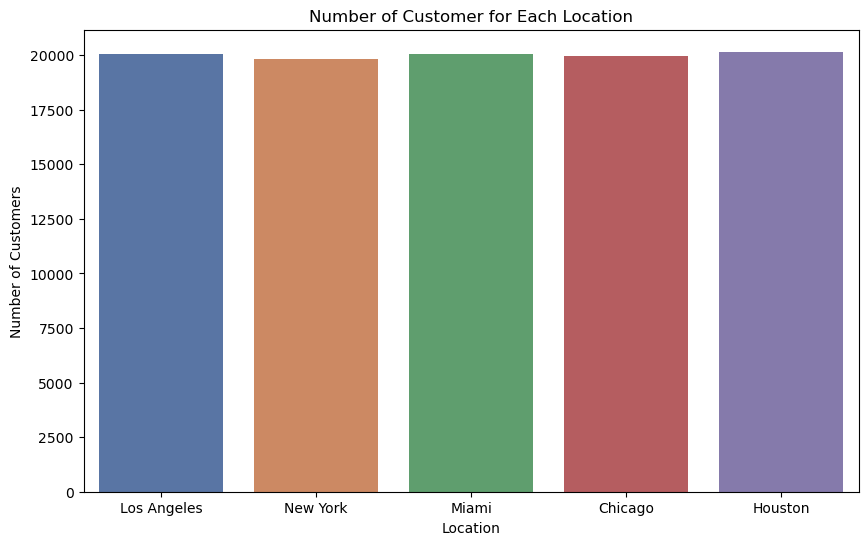

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', palette='deep')
plt.title('Number of Customer for Each Location')
plt.xlabel('Location')
plt.ylabel('Number of Customers');

In [11]:
# Compare Churn column with Location column
pd.crosstab(df.Churn, df.Location)

Location,Chicago,Houston,Los Angeles,Miami,New York
Churn,,,,,
0,10013,10258,10161,9955,9834
1,9945,9899,9880,10076,9979


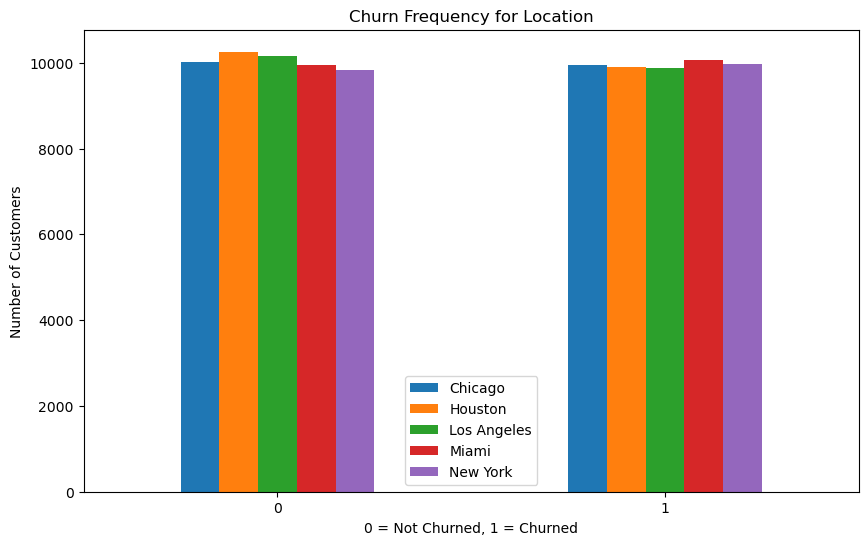

In [12]:
pd.crosstab(df.Churn, df.Location).plot(kind="bar", figsize=(10,6))
plt.title("Churn Frequency for Location")
plt.xlabel("0 = Not Churned, 1 = Churned")
plt.ylabel("Number of Customers")
plt.legend(["Chicago", "Houston", "Los Angeles", "Miami", "New York"])
plt.xticks(rotation=0);

#### Checking for non-numerical features

In [13]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

Name
Gender
Location


In [14]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+ 1

In [15]:
df.dtypes

CustomerID                      int64
Name                            int32
Age                             int64
Gender                           int8
Location                         int8
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

#### Renaming "Churn" to "target"

In [16]:
df.rename(columns = {'Churn':'target'}, inplace = True)

In [17]:
# A balanced binary distribution
df['target'].value_counts()

0    50221
1    49779
Name: target, dtype: int64

#### Creating and Plotting a `Correlation Matrix` to better understand the dataset

In [18]:
corr_matrix = df.corr()
corr_matrix

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,target
CustomerID,1.000000,0.818259,-0.001085,-0.000131,0.000062,0.005444,0.001265,-0.004025,-0.004586
Name,0.818259,1.000000,-0.000948,0.003875,-0.004283,0.007357,0.000353,-0.002791,-0.001418
Age,-0.001085,-0.000948,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,-0.000131,0.003875,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,0.000062,-0.004283,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.005444,0.007357,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.000353,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,-0.002791,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
target,-0.004586,-0.001418,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


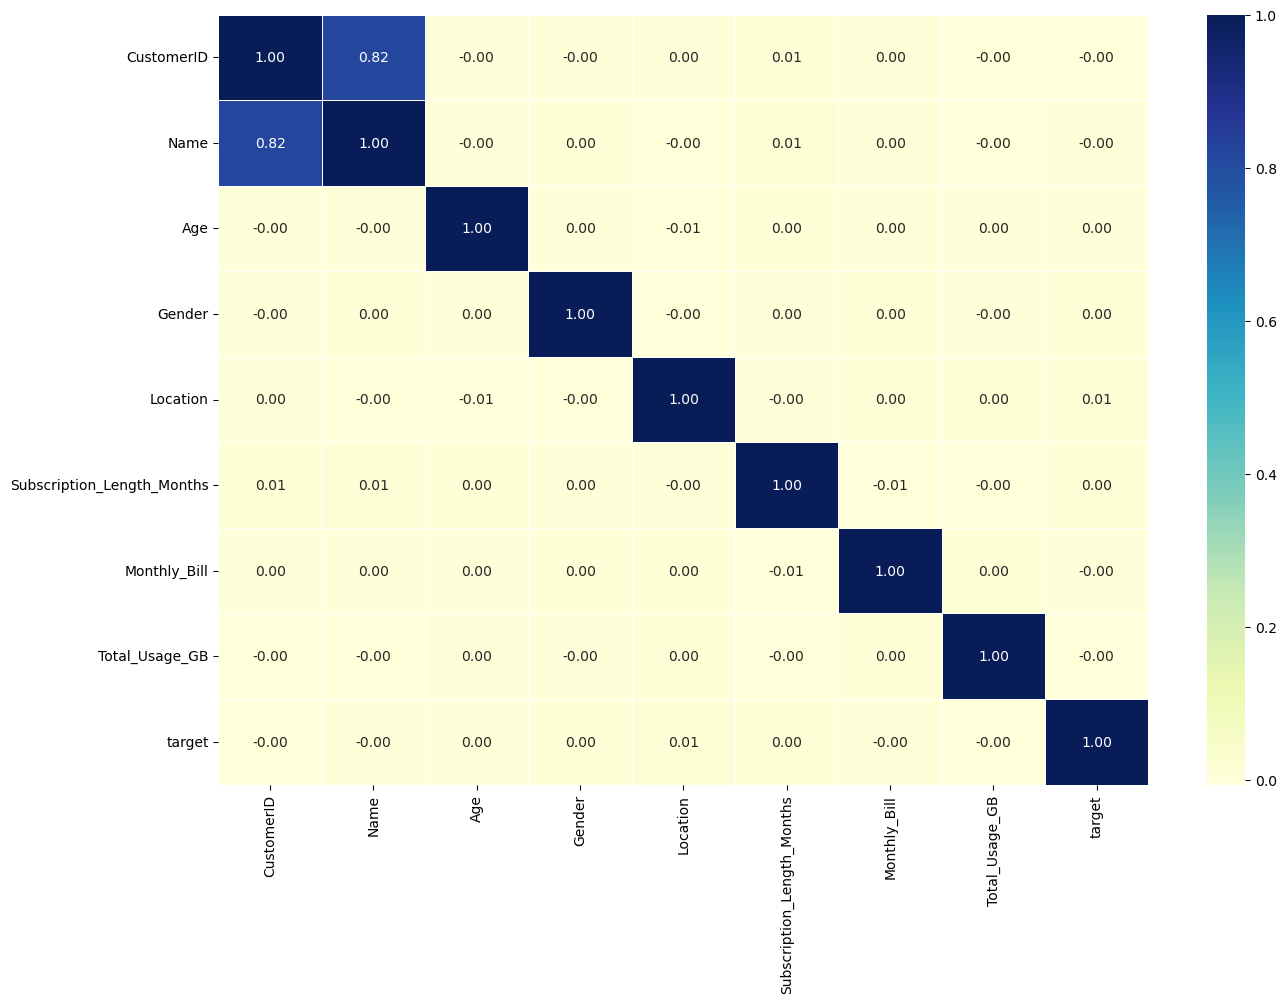

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt=".2f", cmap="YlGnBu")

In [20]:
# No repition in CustomerID
df['CustomerID'].unique

<bound method Series.unique of 0             1
1             2
2             3
3             4
4             5
          ...  
99995     99996
99996     99997
99997     99998
99998     99999
99999    100000
Name: CustomerID, Length: 100000, dtype: int64>

In [21]:
# No repition in Name
df['Name'].unique

<bound method Series.unique of 0             1
1         11113
2         22224
3         33335
4         44446
          ...  
99995     99997
99996     99998
99997     99999
99998    100000
99999         6
Name: Name, Length: 100000, dtype: int32>

* All the values of **Name** and **CustomerId** are unique in the dataset
* As a result, we could drop both the features to get optimal computation time

In [22]:
df.dtypes

CustomerID                      int64
Name                            int32
Age                             int64
Gender                           int8
Location                         int8
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
target                          int64
dtype: object

In [23]:
df = df.drop(["Name","CustomerID"], axis=1)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,target
0,63,2,3,17,73.36,236,0
1,62,1,5,1,48.76,172,0
2,24,1,3,5,85.47,460,0
3,36,1,4,3,97.94,297,1
4,46,1,4,19,58.14,266,0


## Modelling

#### Creating X & y and splitting the data into training and test set

In [24]:
X = df.drop('target', axis=1)
y = df['target']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape

((80000, 6), (20000, 6))

In [27]:
y_train.shape, y_test.shape

((80000,), (20000,))

#### Fitting 4 different Classification Estimators on the data and storing the scores in `model_scores`

In [28]:
model_scores = {}

**Logistic Regression**

In [29]:
%%time
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
model_scores["LogisticRegression"] = lr.score(X_test, y_test)

CPU times: total: 375 ms
Wall time: 249 ms


**SGC Classifier**

In [30]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)  # apply same transformation to test data


sgd = SGDClassifier()
sgd.fit(X_train_scaler, y_train)
model_scores["SGDClassifier"] = sgd.score(X_test_scaler, y_test)

CPU times: total: 234 ms
Wall time: 248 ms


**KNeighborsClassifier**

In [31]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
model_scores["KNeighborsClassifier"] = knn.score(X_test, y_test)

CPU times: total: 781 ms
Wall time: 977 ms


**RandomForestClassifier**

In [32]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
model_scores['RandomForestClassifier'] = clf.score(X_test, y_test)

CPU times: total: 43.1 s
Wall time: 7.08 s


In [33]:
# These are the accuracy scores for the Models
model_scores

{'LogisticRegression': 0.4956,
 'SGDClassifier': 0.4967,
 'KNeighborsClassifier': 0.502,
 'RandomForestClassifier': 0.4975}

**Plotting the scores using bar graph** 

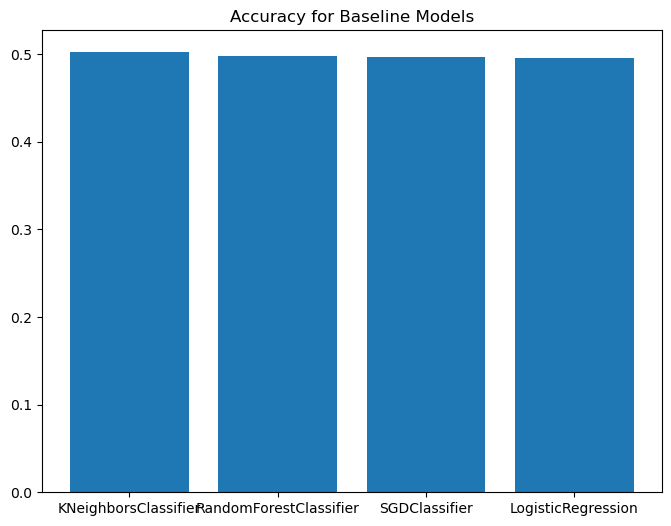

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# model_scores_df.plot.bar()
model_scores_df = pd.DataFrame(model_scores, index=['accuracy']).T
model_scores_df = model_scores_df.sort_values(by="accuracy", ascending=False)
model_scores_df
plt.figure(figsize=(8, 6))
plt.bar(model_scores_df.index, model_scores_df['accuracy'])
plt.title("Accuracy for Baseline Models")
plt.xticks(rotation=0);

### Computing cross validated metrics using `cross_val_score`

In [35]:
from sklearn.model_selection import cross_val_score

def cross_validated_metrics(model, X, y):
    cvm = []
    cvm.append(np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy")))
    cvm.append(np.mean(cross_val_score(model, X, y, cv=5, scoring="precision")))
    cvm.append(np.mean(cross_val_score(model, X, y, cv=5, scoring="recall")))
    cvm.append(np.mean(cross_val_score(model, X, y, cv=5, scoring="f1")))
    return cvm

In [36]:
# For Storing Cross-Validated Metrics
cv_metrics = {}

In [37]:
%%time
cv_metrics['RandomForestClassifier'] = cross_validated_metrics(clf, X, y)
cv_metrics['KNeighborsClassifier'] = cross_validated_metrics(knn, X, y)
cv_metrics['SGDClassifier'] = cross_validated_metrics(sgd, X, y)
cv_metrics['LogisticRegression'] = cross_validated_metrics(lr, X, y)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: total: 2min 5s
Wall time: 4min 26s


In [38]:
cv_metrics

{'RandomForestClassifier': [0.49776,
  0.49692503369461055,
  0.4722675543360147,
  0.48370202139830837],
 'KNeighborsClassifier': [0.50096,
  0.4987526003237927,
  0.49563068561439294,
  0.49718412514086363],
 'SGDClassifier': [0.49808,
  0.42631496894409937,
  0.5999598232221776,
  0.4034006838446539],
 'LogisticRegression': [0.50044,
  0.49768152716304054,
  0.31627851042830546,
  0.3854323886587595]}

In [39]:
cvm_df = pd.DataFrame(cv_metrics, index=["Accuracy","Precision","Recall","F1"])
cvm_df

,RandomForestClassifier,KNeighborsClassifier,SGDClassifier,LogisticRegression
Accuracy,0.497760,0.500960,0.498080,0.500440
Precision,0.496925,0.498753,0.426315,0.497682
Recall,0.472268,0.495631,0.599960,0.316279
F1,0.483702,0.497184,0.403401,0.385432


In [40]:
cvm_col = list(cvm_df.columns)

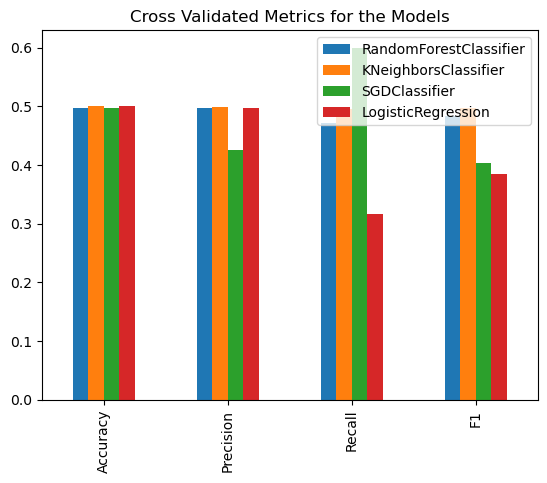

In [41]:
cvm_df.plot.bar(title="Cross Validated Metrics for the Models", legend=True);

* In a customer churn context, **high precision** means that when the model predicts a customer will churn, it is likely to be correct. You want to avoid falsely flagging customers as churning when they are not because this can result in unnecessary retention efforts or negative customer experiences.

* In a customer churn context, **high recall** means that the model is effective at capturing most of the customers who are truly churning. This can be important if retaining customers is a high priority and you want to avoid missing potential churn cases.

* Based on the provided metrics, the SGDClassifier appears to have the highest recall , which means it's better at identifying true churn cases. However, it has relatively low precision, meaning it may generate more false positives.

* The RandomForestClassifier also has a decent balance between precision and recall
* The KNeighborsClassifier has the highest precision but a lower recall, which means it's better at avoiding false positives but might miss some true churn cases.

* The LogisticRegression model has the lowest performance in terms of both precision and recall.

* Eliminating LogisticRegression because of low precision and reacll
* Eliminating Sgdclassifier because of low precision
* Choosing **RandomForestClassifier** and **KNeigborsClassifier** for further tuning because they have a balance of precision and recall

### Hyperparameter Tuning on KNN

In [42]:
%%time
# Tuning KNN
from sklearn.metrics import precision_score, recall_score

recalls = []
precisions = []

# Creating a list of different values for K-Neighbors
neighbors = range(5,100,2)

# Setup KNN instance
knn = KNeighborsClassifier()

max_r=0
max_p=0

max_recall=0
max_precision=0

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    knn.score(X_test, y_test)
    
    y_preds = knn.predict(X_test)
    
    recall = recall_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)

    recalls.append(recall)
    precisions.append(precision)
    
    if recall > max_recall:
        max_recall = recall
        max_r = i
    
    if precision > max_precision:
        max_precision = precision
        max_p = i

CPU times: total: 1min 25s
Wall time: 1min 54s


Maximum Recall score on the test data is for n_neighbors = 23
Maximum Precision score on the test data is for n_neighbors = 85


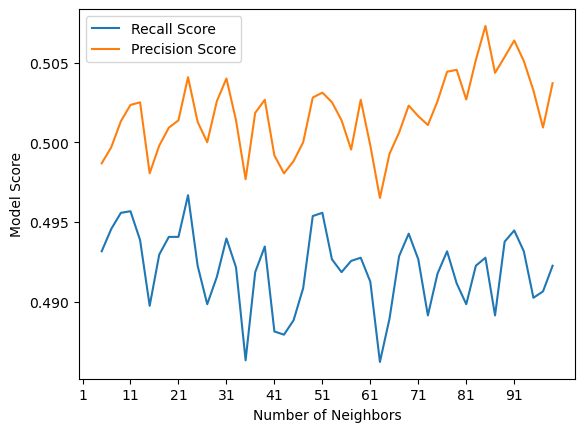

In [43]:
plt.plot(neighbors, recalls, label="Recall Score")
plt.plot(neighbors, precisions, label="Precision Score")
plt.xticks(np.arange(1,100,10))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum Recall score on the test data is for n_neighbors = {max_r}")
print(f"Maximum Precision score on the test data is for n_neighbors = {max_p}")

plt.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=max_r)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5073

In [45]:
from sklearn.metrics import f1_score, accuracy_score

knn_y_preds = knn.predict(X_test)

knn_recall = recall_score(y_test, knn_y_preds)
knn_precision = precision_score(y_test, knn_y_preds)
knn_accuracy = accuracy_score(y_test, knn_y_preds)
knn_f1 = f1_score(y_test, knn_y_preds)

In [46]:
knn_recall, knn_precision, knn_accuracy, knn_f1

(0.49667807529695995, 0.5040866366979976, 0.5073, 0.5003549335767163)

### Hyperparameter Tuning on RandomForestClassifier

In [47]:
%%time
from sklearn.model_selection import RandomizedSearchCV
# Create hyperparameter grid for RandomForestClassifer
rf_grid = {
    "n_jobs" : [-1],
    "n_estimators" : np.arange(100,1000,200),
    "max_depth" : [None, 3,5],
    "min_samples_split" : np.arange(2,20,4),
    "min_samples_leaf" : np.arange(1,20,4)
}


# Setup grid hyperparameter search for RandomForestClassifier
rfc_t = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=2, verbose=True)

# Fit the hyperparameter search model
rfc_t.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 50.5 s
Wall time: 1min 16s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([100, 300, 500, 700, 900]),
                                        'n_jobs': [-1]},
                   verbose=True)

In [48]:
rfc_t.best_params_

{'n_jobs': -1,
 'n_estimators': 700,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [49]:
rfc_t.score(X_test, y_test)

0.4995

In [50]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=900, min_samples_split=18, min_samples_leaf=1, max_depth=5)
rfc.fit(X_train, y_train)
rfc_y_preds = rfc.predict(X_test)

In [51]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

rfc_recall = recall_score(y_test, rfc_y_preds)
rfc_precision = precision_score(y_test, rfc_y_preds)
rfc_accuracy = accuracy_score(y_test, rfc_y_preds)
rfc_f1= f1_score(y_test, rfc_y_preds)

In [52]:
rfc_recall, rfc_precision, rfc_accuracy, rfc_f1

(0.33480974431246224, 0.5000751766651631, 0.50335, 0.4010853180584866)

**Storing the metrics for the Tuned Classifiers**

In [53]:
new_metrics = {}
new_metrics['KNeighborsClassifier'] = [knn_accuracy, knn_precision, knn_recall, knn_f1]
new_metrics['RandomForestClassifier'] = [rfc_accuracy, rfc_precision, rfc_recall, rfc_f1]

In [54]:
new_metrics_df = pd.DataFrame(new_metrics, index=["Accuracy","Precision","Recall","F1"])
new_metrics_df

,KNeighborsClassifier,RandomForestClassifier
Accuracy,0.507300,0.503350
Precision,0.504087,0.500075
Recall,0.496678,0.334810
F1,0.500355,0.401085


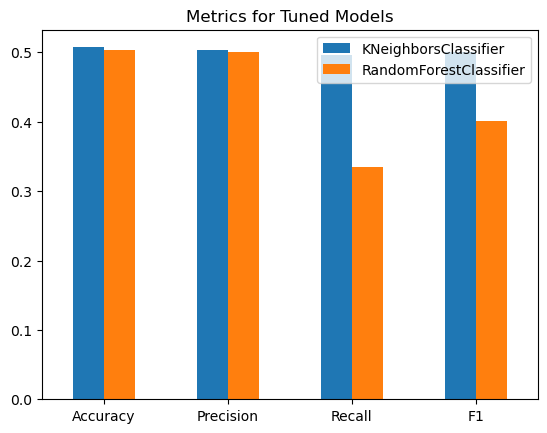

In [55]:
new_metrics_df.plot.bar(title="Metrics for Tuned Models", legend=True);
plt.xticks(rotation=0);

## Evaluating tuned KNeighborClassifier estimator

* ROC Curve
* Confusion Matrix
* Classification Report

**ROC Curve**

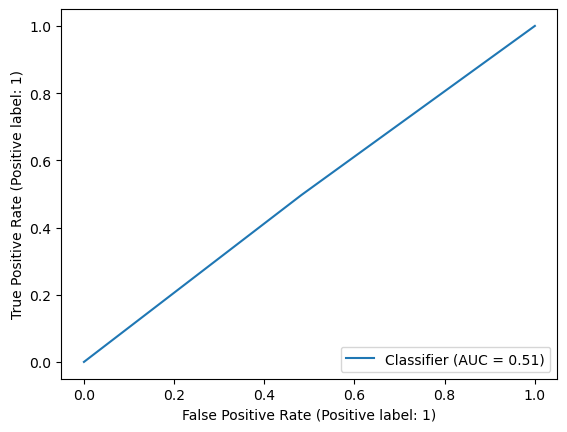

In [56]:
from sklearn.metrics import RocCurveDisplay

# Plottin ROC curve and calculating the AUC metric
RocCurveDisplay.from_predictions(y_test, knn_y_preds)

**Confusion Matrix**

In [57]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, knn_y_preds))

[[5212 4854]
 [5000 4934]]


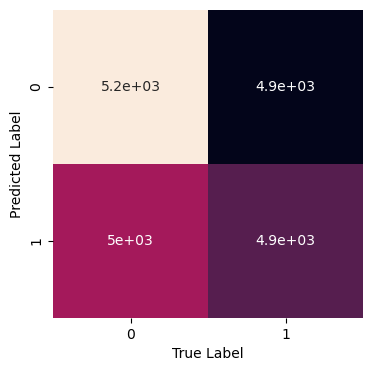

In [58]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(confusion_matrix(y_test, knn_y_preds),annot=True, cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');

**Classification Report**

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_y_preds))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51     10066
           1       0.50      0.50      0.50      9934

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000



# Exporting the model

In [60]:
print(knn)

KNeighborsClassifier(n_neighbors=23)


In [61]:
import pickle
pickle.dump(knn, open('model.pkl', 'wb'))

In [62]:
import joblib
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [65]:
df.Gender.value_counts()

1    50216
2    49784
Name: Gender, dtype: int64

In [67]:
df.Location.value_counts()

2    20157
3    20041
4    20031
1    19958
5    19813
Name: Location, dtype: int64